In [2]:
import pandas as pd
import numpy as np

import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
import plotly.io as pio
init_notebook_mode(connected=True)

In [4]:
todos_df = pd.read_csv('mejora_todos.csv')
todos_df

,rating,N,mae_binary_k_1,mae_q_k_1,mae_binary_k_2,mae_q_k_2,mae_binary_k_3,mae_q_k_3,mae_binary_k_5,mae_q_k_5,mae_binary_k_10,mae_q_k_10,improvement_k_1,improvement_k_2,improvement_k_3,improvement_k_5,improvement_k_10
0,0.5,5,1.229655,0.939421,1.424190,0.786274,1.306242,0.898325,1.352256,0.990024,1.312955,1.060333,23.602905,44.791488,31.228238,26.787254,19.240713
1,1.0,37,1.184412,0.773523,1.082113,0.831696,1.101231,0.853151,1.068323,0.892401,0.994830,0.930619,34.691360,23.141444,22.527590,16.467083,6.454526
2,1.5,4,1.326741,1.260298,1.384137,0.911693,1.424269,0.840562,1.295816,0.957303,1.122645,0.939636,5.008010,34.132696,40.982926,26.123528,16.301629
3,2.0,85,1.045612,0.998247,0.995112,1.023104,1.022652,0.982431,0.976702,0.965164,0.978758,0.971593,4.529862,-2.813008,3.932948,1.181281,0.732018
4,2.5,34,1.093007,0.908937,1.028352,0.945345,1.062582,0.925157,0.984431,0.940490,0.990279,0.923506,16.840727,8.071794,12.933116,4.463589,6.742832
5,3.0,295,0.989808,0.887151,0.947001,0.873599,0.932599,0.871159,0.937845,0.891133,0.929645,0.892748,10.371358,7.751074,6.588028,4.980723,3.968933
6,3.5,95,0.838946,0.843756,0.814280,0.808582,0.821094,0.806571,0.858908,0.835744,0.859011,0.840179,-0.573327,0.699760,1.768637,2.696962,2.192261
7,4.0,304,0.905978,0.879399,0.927009,0.909479,0.912241,0.888916,0.917151,0.901579,0.914550,0.904916,2.933700,1.891080,2.556897,1.697866,1.053395
8,4.5,66,0.974037,0.944080,1.054315,0.909282,1.016703,0.919035,1.004227,0.959164,0.938284,0.928067,3.075468,13.756143,9.606298,4.487271,1.088828
9,5.0,219,1.056682,1.027154,1.025270,0.976866,1.024363,0.986811,1.011049,0.969214,1.003700,0.981659,2.794355,4.721154,3.665894,4.137788,2.195979


In [5]:
todos_df.drop(columns=['mae_binary_k_1', 'mae_q_k_1', 'mae_binary_k_2', 'mae_q_k_2', 'mae_binary_k_3', 'mae_q_k_3', 'mae_binary_k_5', 'mae_q_k_5', 'mae_binary_k_10', 'mae_q_k_10'], inplace=True)

In [6]:
todos_df.drop(index=[0, 2], inplace=True)

In [7]:
todos_df

,rating,N,improvement_k_1,improvement_k_2,improvement_k_3,improvement_k_5,improvement_k_10
1,1.0,37,34.691360,23.141444,22.527590,16.467083,6.454526
3,2.0,85,4.529862,-2.813008,3.932948,1.181281,0.732018
4,2.5,34,16.840727,8.071794,12.933116,4.463589,6.742832
5,3.0,295,10.371358,7.751074,6.588028,4.980723,3.968933
6,3.5,95,-0.573327,0.699760,1.768637,2.696962,2.192261
7,4.0,304,2.933700,1.891080,2.556897,1.697866,1.053395
8,4.5,66,3.075468,13.756143,9.606298,4.487271,1.088828
9,5.0,219,2.794355,4.721154,3.665894,4.137788,2.195979


In [98]:
y_values = todos_df['rating'].values
#x_values = [5, 4.5, 4, 3.5, 3, 2.5, 2, 1]
x_values = todos_df.columns.values[2:]#['K=1', 'K=2', 'K=3', 'K=5', 'K=10']#

In [99]:
z_values = todos_df[x_values].values
x_values = ['K=1', 'K=2', 'K=3', 'K=5', 'K=10']

In [111]:
annotations = []

for i in range(len(x_values)):
    for j in range(len(y_values)):
        
        color = 'rgb(0,0,0)'
        if z_values[j][i] > 25:
            color='rgb(255,255,255)'

        annotations.append(
            dict(
                xref = 'x',
                yref = 'y',
                x = i,
                y = y_values[j],
                text=str(round(z_values[j][i], 2)),
                showarrow=False,
                ax=0,
                ay=0,
                font=dict(
                    size=14,
                    color = color
                )
            )
        )

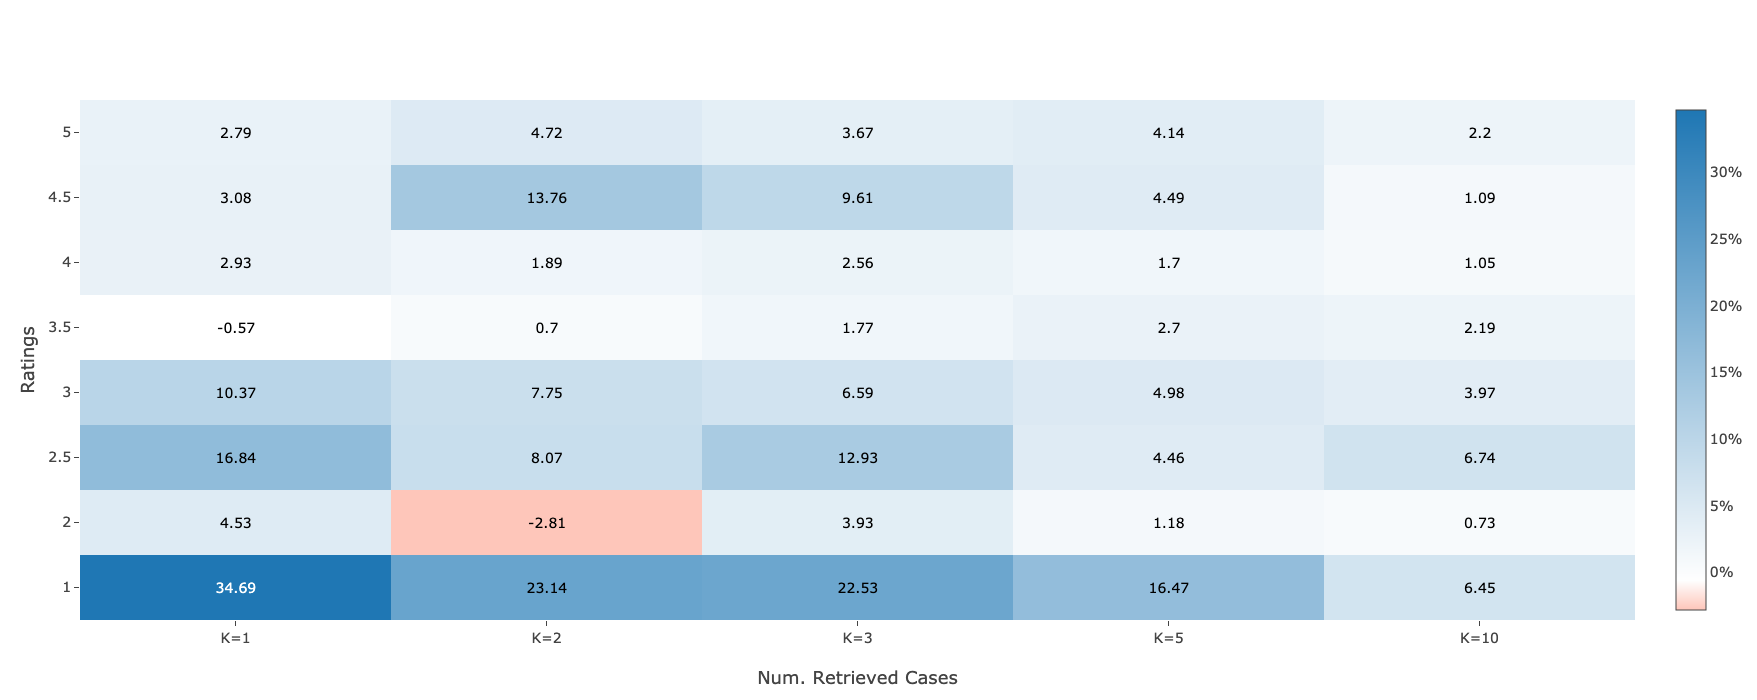

In [112]:
trace = go.Heatmap(z= z_values,
                   x= x_values,
                   y= y_values,
                   colorscale=[[0.0, 'rgb(254,198,186)'], [0.059, 'rgb(255,255,255)'], [1.0, 'rgb(31, 119, 180)']],
                   colorbar=dict(tickfont=dict(size=14), ticksuffix='%'))

layout = go.Layout(
    autosize=False,
    width=700,
    height=700,
    yaxis=dict(
        title='Ratings',
        type='category',
        titlefont=dict(
            size=18
        ),
        tickfont=dict(
            size=14
        )
        #range=[0.5, 5.5]
    ),
    xaxis=dict(
        title = 'Num. Retrieved Cases',
        titlefont=dict(
            size=18
        ),
        tickfont=dict(
            size=14
        )
    ),
    annotations=annotations
)



data=[trace]
fig = go.Figure(data=data, layout=layout)

iplot(fig, filename='labelled-heatmap')

In [113]:
pio.write_image(fig, 'heatmap_all.png')